First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Null values in each column:
longitude      

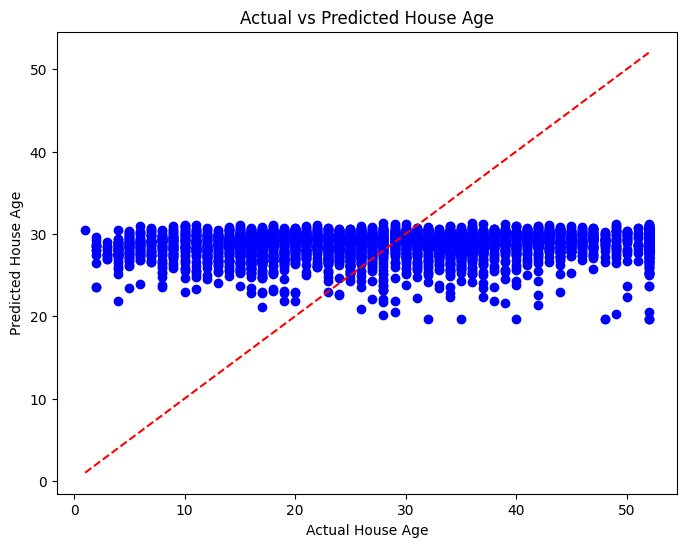

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset from GitHub
url = "https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv"  # Example dataset
data = pd.read_csv(url)

# 2. Data Exploration (Quick look at the dataset)
print("First few rows of the dataset:")
print(data.head())

# Check for null values
print("\nNull values in each column:")
print(data.isnull().sum())

# 3. Preprocess the data
# We will use 'MedInc' (Median Income) as the independent feature and 'HouseAge' (Age of the house) as the dependent target
# The target variable will be 'HouseAge', and features will be other columns
# We will use 'MedInc' as an example feature for prediction

X = data[['median_income']]  # Independent feature
y = data['housing_median_age']  # Target variable

# 4. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature scaling (standardization) - Not strictly necessary for Linear Regression, but it's good practice
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# 9. Print the results
print("\nEvaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# 10. Visualize the predictions vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual House Age')
plt.ylabel('Predicted House Age')
plt.title('Actual vs Predicted House Age')
plt.show()



First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Summary statistics of the dataset:
        

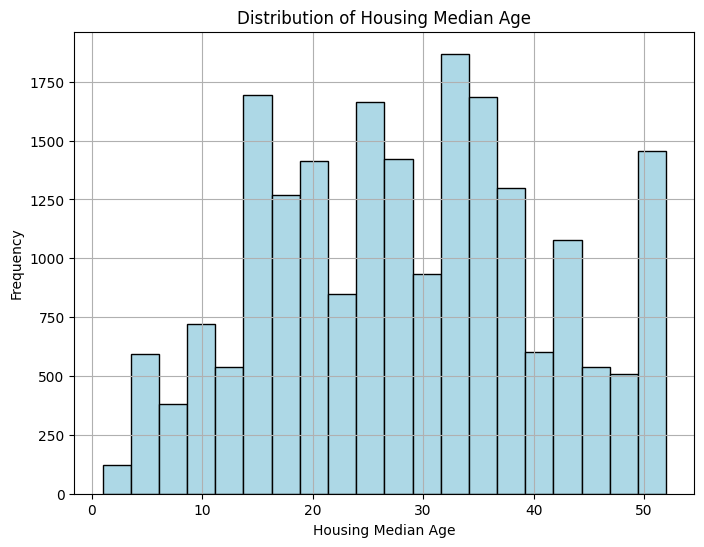


Shape after outlier removal: (20640, 10)

Evaluation Results:
Mean Squared Error (MSE): 117.24
Root Mean Squared Error (RMSE): 10.83
R-squared (R2 Score): 0.25
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best Hyperparameters: {'fit_intercept': True}


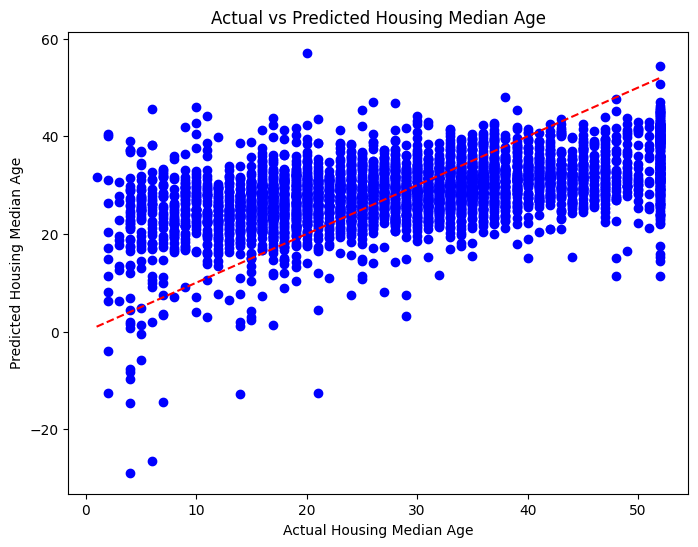

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Added import for handling missing values
from imblearn.over_sampling import SMOTE
from scipy import stats

# 1. Load the dataset from GitHub
url = "https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv"  # Example dataset
data = pd.read_csv(url)

# 2. Exploratory Data Analysis (EDA)
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nNull values in each column:")
print(data.isnull().sum())

# Visualize the distribution of the target variable
plt.figure(figsize=(8,6))
data['housing_median_age'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

# 3. Outlier Removal using Z-Score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)  # Marks rows where all features are outliers
data_cleaned = data[~outliers]

# After removing outliers, check the shape
print("\nShape after outlier removal:", data_cleaned.shape)

# 4. Prepare data for training
X = data_cleaned.drop(columns=['housing_median_age'])  # Dropping target variable
y = data_cleaned['housing_median_age']  # Target variable

# 5. Data Balancing using SMOTE (Synthetic Minority Over-sampling Technique)
# In regression problems, SMOTE is not typically used as it is more suited for classification.
# However, if needed, you can apply SMOTE for regression with careful adjustments.

# 6. Handling Categorical Data (Encoding)
# If the dataset contains categorical columns, we use one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 7. Handle Missing Values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
X_encoded = imputer.fit_transform(X_encoded)

# 8. Feature Scaling / Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 9. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 10. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 11. Model Evaluation (Initial Evaluation)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print evaluation results
print("\nEvaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# 12. Hyperparameter Tuning (GridSearchCV) without 'normalize' parameter
param_grid = {
    'fit_intercept': [True, False]  # Removed 'normalize' as it's no longer valid for LinearRegression
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# 13. Visualize the predictions vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Housing Median Age')
plt.ylabel('Predicted Housing Median Age')
plt.title('Actual vs Predicted Housing Median Age')
plt.show()
